#**RANDOM FOREST MODEL**

**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
#unique values in each column
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
df_unique

,Variable,DistinctCount
0,User ID,400
1,Gender,2
2,Age,43
3,EstimatedSalary,117
4,Purchased,2


Dropping the `User ID` column.

In [8]:
df=df.drop(['User ID'], axis=1)

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Convert gender colum to int format.

Male is 0

Female is 1


In [10]:
df['Gender'] = df['Gender'].map({'Male':0 ,'Female':1})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


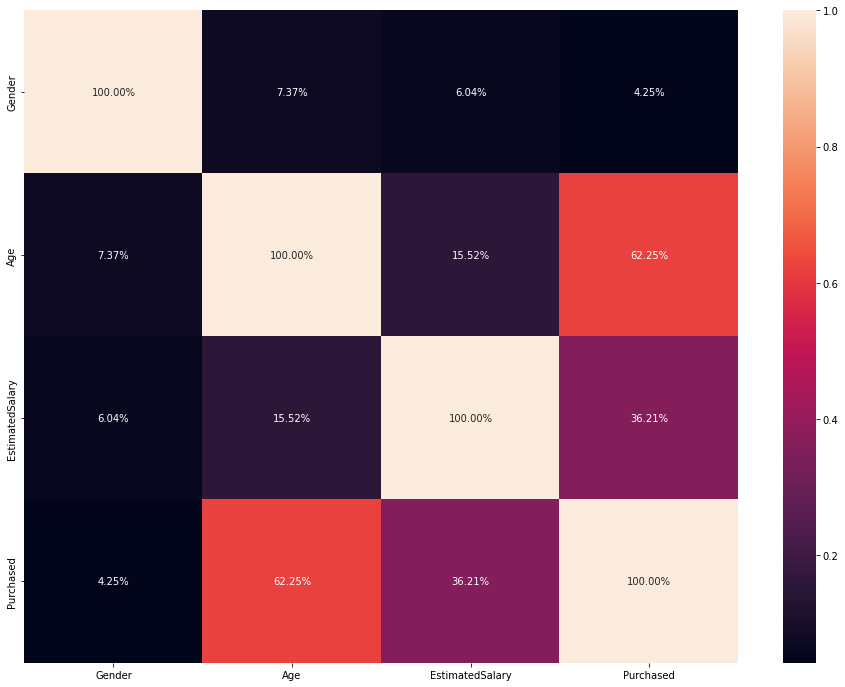

In [11]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, fmt = '.2%')

**EDA**

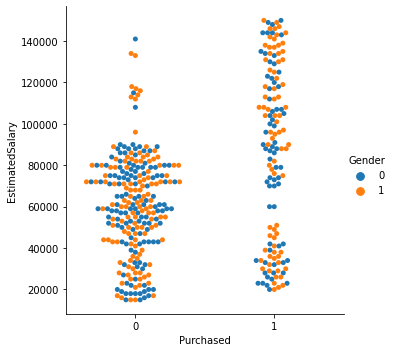

In [12]:

sns.catplot(x="Purchased", y="EstimatedSalary", hue="Gender", kind="swarm", data=df)

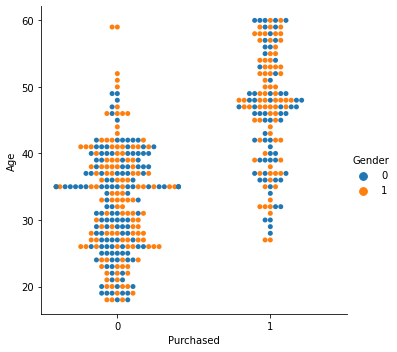

In [13]:
sns.catplot(x="Purchased", y="Age", hue="Gender", kind="swarm", data=df)

From the diagram we can tell that `Purchased` is highly correlated with `Age`. The `Estimatedsalary` has also a good correlation.

Creatting dummy variables for encoding

In [14]:
b = []
for i in df.keys():
  b.append(i)
print(b)

['Gender', 'Age', 'EstimatedSalary', 'Purchased']


In [15]:
df = pd.get_dummies(df, columns = ['Gender'])

In [16]:
b = []
for i in df.keys():
  b.append(i)
print(b)

['Age', 'EstimatedSalary', 'Purchased', 'Gender_0', 'Gender_1']


In [17]:
df

,Age,EstimatedSalary,Purchased,Gender_0,Gender_1
0,19,19000,0,1,0
1,35,20000,0,1,0
2,26,43000,0,0,1
3,27,57000,0,0,1
4,19,76000,0,1,0
...,...,...,...,...,...
395,46,41000,1,0,1
396,51,23000,1,1,0
397,50,20000,1,0,1
398,36,33000,0,1,0


**Fitting Random Forest to the Training set**

**Splitting the dataset into the Training set and Test set**

In [18]:
b.remove('Purchased')

In [19]:
b

['Age', 'EstimatedSalary', 'Gender_0', 'Gender_1']

In [20]:
X = df[b].values#array of features
y = df['Purchased'].values

In [21]:
X

array([[   19, 19000,     1,     0],
       [   35, 20000,     1,     0],
       [   26, 43000,     0,     1],
       ...,
       [   50, 20000,     0,     1],
       [   36, 33000,     1,     0],
       [   49, 36000,     0,     1]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

**Feature Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**Fitting the Random Forest model**

In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

# Instantiate model 
rf = RandomForestClassifier(max_depth=2,n_estimators=20,random_state=10)

# Train the model on training data
rf.fit(X_train_scaled, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test_scaled)

# # Calculate the absolute errors
# errors = abs(predictions - original_test_labels)

# # Print out the mean absolute error (mae)
# print('MAE :', round(np.mean(errors), 2), 'degrees.')

# Compare to baseline
# improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
# print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

#r2_score(baseline_preds, original_test_labels)
r2_score(y_pred, y_test)

0.6875

In [25]:
training_score = rf.score(X_train_scaled,y_train)*100
print("Train data score is :",training_score)

Train data score is : 90.9375


In [26]:
from sklearn.metrics import RocCurveDisplay

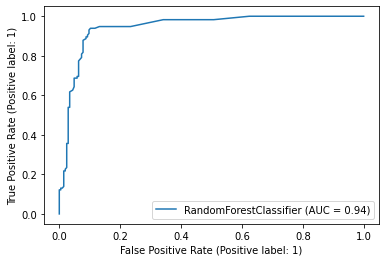

In [27]:
RocCurveDisplay.from_estimator(rf,X_train_scaled,y_train)

Here we have 94% of accuracy.

In [37]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
#logistic_regression.score(X_test,y_test) # accuracy
#confusion_matrix(y_test,y_pred)
f1_score(y_test,y_pred)
#logistic_regression.score(X_test,y_test)
# rf.roc_auc_score(y_test, y_pred)


0.8999999999999999

In [38]:
confusion_matrix(y_test,y_pred)

array([[47,  5],
       [ 1, 27]])

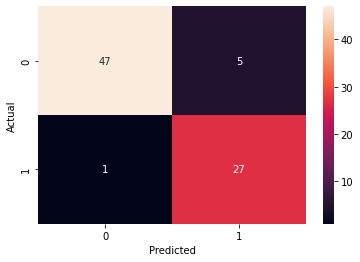

In [40]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# Interpret Model Results

In [28]:
from sklearn import tree

In [29]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = b, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

In [30]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 2


In [31]:
# Limit depth of tree to 2 levels
rf_small = RandomForestClassifier(n_estimators=20, max_depth = 2, random_state=42)
rf_small.fit(X_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = b, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');

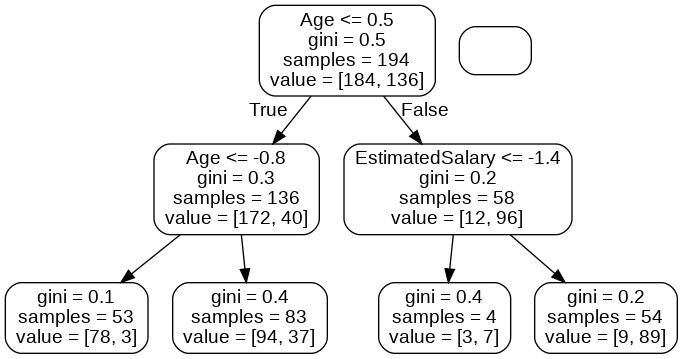

# Variable Importances

In [32]:

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(b, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: Age                  Importance: 0.66
Variable: EstimatedSalary      Importance: 0.33
Variable: Gender_0             Importance: 0.0
Variable: Gender_1             Importance: 0.0


That is, gender has no importance.